<div class="alert alert-block alert-success">
<b>COMENTARIO GENERAL PRIMERA REVISIÓN</b> <a class="tocSkip"></a>

Sara, felicidades! Tu trabajo es perfecto y está aprobado. Efectuaste correctamente las instrucciones de este proyecto, obtuviste datos correctos empleando los querys de SQL y aplicaste las instrucciones posteriores de manera perfecta, yendo un poco más allá incluso que lo que se te pedía!! Sigue esforzándote así! :)

</div>

# Zuber: Empresa de viajes compartidos

# Contents
* [1.- Introducción y Objetivos.](#objetivo)
* [2.-Importacion de los archivos](#importacion)
* [3.- Análisis exploratorio de los datos](#análisis)
* [4.- Prueba de hipótesis](#pruebas)
* [5.- Conclusión General](#conclusiongeneral)

# 1. Introducción y Objetivos

Zuber es nuestra nueva empresa de viajes compartidos que la estamos incorporando en la ciudad de Chicago. 
Dentro de mi rol como analista de datos, mi objetivo en este proyecto será encontrar patrones de preferencias de los pasajeros en cuanto a sus viajes, es decir que lugares de destino prefieren, cuales son las empresas de taxis más demandadas en la industria y el impacto de los factores externos en la frecuencia de los viajes. 


# 2. Importación de los archivos

In [1]:
# Importaremos las siguientes librerías
import pandas as pd 
import matplotlib as plt 
from scipy import stats as st
from scipy.stats import levene
import numpy as np

Procederemos a importar los dos archivos con los que realizaremos el análisis exploratorio. 

**project_sql_result_01.csv.**

Contiene los siguientes datos:

* company_name: nombre de la empresa de taxis

* trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

**project_sql_result_04.csv.** 

Contiene los siguientes datos:

* dropoff_location_name: barrios de Chicago donde finalizaron los viajes

* average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Muy buen intro al proyecto!

In [2]:
# Crearemos dos DataFrames para almacenar los archivos 
cabs= pd.read_csv('/datasets/project_sql_result_01.csv')
trips= pd.read_csv('/datasets/project_sql_result_04.csv')

In [3]:
# Mostramos la información del DataFrame cabs
cabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Podemos ver que el tipo de dato coincide para cada columna, ni tampoco existen valores ausentes por lo que no es necesario hacer modificaciones.

In [4]:
cabs.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
# Mostramos la información del DataFrame trips
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Buen inicio! El read con la ruta correcta, el head, y el info!

Encontramos que ninguna columna tiene valores ausentes, pero la columna que contiene el promedio de viajes podemos ver que se encuentra como tipo de dato float, por lo que procederemos a realizar el cambio de tipo de dato a entero.

In [6]:
#Cambio de tipo de dato
trips['average_trips']= trips['average_trips'].astype(int)

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Ok, buen cambio de tipo!

# 3. Análisis exploratorio de los datos

**3.1 Identificaremos cuáles son lo 10 principales barrios más populares en términos de finalización del recorrido durante noviembre del 2017**

<AxesSubplot:title={'center':'Top 10 Barrios en términos de finalización del recorrido'}, xlabel='dropoff_location_name'>

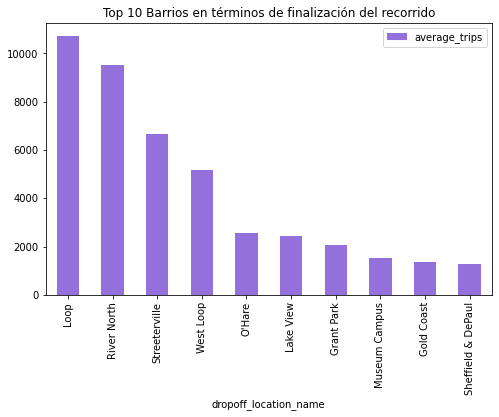

In [7]:
trips1= trips.pivot_table(index='dropoff_location_name', values='average_trips').sort_values(by='average_trips',ascending=False).head(10).plot(kind='bar',title='Top 10 Barrios en términos de finalización del recorrido', figsize=(8,5),color='mediumpurple')
trips1

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Muy bien mostrar esto con una ilustrativa gráfica :)

* Los 10 Barrios con mayores cantidades promedios en cuanto a donde finalizó el viaje de los pasajeron son: 
    1. Loop 
    2. River North
    3. Streeteville
    4. West Loop
    5. O'Hare
    6. Lake View
    7. Grant Park
    8. Museum Campus
    9. Gold Coast
    10. Sheffield & DePaul
    
    
* De acuerdo a los datos vemos que en la ciudad de Chicago el barrio Loop es el que más viajes de finalización se registraron porque corresponde a que es una zona activa que tiene restaurantes, rascacielos, tiendas, teatros, parques y principalmente por su atractivo turístico de la escultura "Cloud Gate "que se localiza en el Parque Millennium.
* El resto de barrios también comparten características en común en cuanto a ser más frecuentes en los viajes de los pasajeros por su atractividad por ejemplo lugares de diversión como lagos, restaurantes, museos, playas, hoteles, centros comerciales y aeropuertos.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Excelentes comentarios, Sara! gracias por investigar más allá :)

**3.2 Identificaremos del otro DataFrame los datos de la competencia, es decir cuáles son las 10 empresas de taxis con mayores números de viajes entre el 15 y 16 de noviembre del 2017, y lo representaremos en un gráfico de pastel para observar dentro del top 10 que porcentaje de participación representa cada empresa.**

<AxesSubplot:title={'center':'Participación dentro del Top 10 de las empresas de taxis con mayores viajes'}, ylabel='trips_amount'>

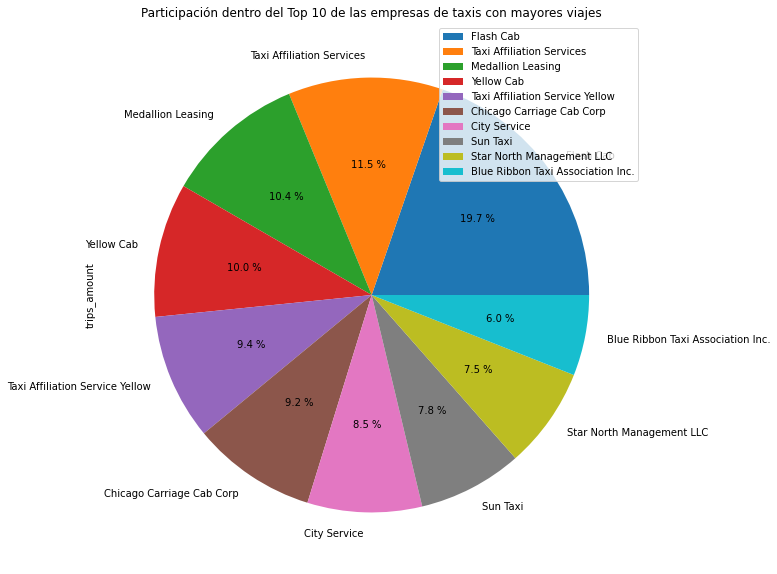

In [8]:
cabs1= cabs.pivot_table(index='company_name', values='trips_amount').sort_values(by='trips_amount',ascending=False).head(10).plot(kind='pie',y='trips_amount',title='Participación dentro del Top 10 de las empresas de taxis con mayores viajes', figsize=(11,10),autopct='%0.1f %%')
cabs1

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Excelente representar esto con una gráfica de pastel! es mejor!

* El top 10 de empresas de taxis con mayores viajes registrados entre el 15 y 16 de noviembre del 2017 son: 
    1. Flash Cab
    2.Taxi Affiliation Services
    3.Medallion Leasing
    4.Yellow Cab
    5.Taxi Affiliation Service Yellow
    6. Chicago Carriage Cab Corp
    7. City Service	
    8. Sun Taxi
    9. Star North Management LLC
    10. Blue Ribbon Taxi Association Inc.
    
    
* Dentro de este grupo, el 50% de la participación son representados por las empresas de: Flash Cab, 
    Taxi Affiliation Services, Medallion Leasing y Yellow Cab. 
* Para el resto de las empresas de taxis tiene una participación entre el 9% y 6%, por lo que se puede decir que hay presencia de una rivalidad en la industria de movilización.


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Muy bien!

**Conclusiones intermedias**

* La empresa líder de taxis es Fash Cab que representa casi el 20% dentro del top 10 de empresas con mayores registros de viajes entre el 15 y 16 de noviembre del 2017. 
* Los barrios que tienen un mayor promedio como destino del viaje son lugares dentro de la ciudad de Chicago que son centros turísticos, comerciales, hostería y aeropuertos.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Genial agregar conclusiones intermedias!

# 4. Prueba de hipótesis

El resultado de este último archivo contiene datos sobre viajes realizados los días sábados de noviembre de 2017 desde el Loop hasta el Aeropuerto Internacional O'Hare. 
Estos son los valores de campo de la tabla:

* start_ts: fecha y hora de la recogida

* weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje

* duration_seconds: duración del viaje en segundos

In [9]:
#Recuperamos el archivo
ph=pd.read_csv('/datasets/project_sql_result_07.csv')

In [10]:
# Mostramos las primeras 5 filas del DataFrame
ph.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [11]:
# Vemos la información del DataFrame
ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Por lo que observamos en la tabla la columna start_ts esta con formato de año-mes-dia-horas y minutos, mientras que el tipo de dato lo está considerando como tipo objeto, por lo que cambiaremos al tipo de dato de fecha.

In [12]:
ph['start_ts']= pd.to_datetime(ph['start_ts'], format='%Y-%m-%dT%H:%M')

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Buen cambio de tipo!

In [13]:
#Comprobación del cambio en el tipo de dato
ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


A continuación evaluaremos una prueba de hipótesis sobre si un factor externo como es el clima afecta en la duración del viaje.

**4.1 La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos**

* H₀= La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados no lluviosos.
* H₁ = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Buena definición de hipótesis

Para la pruebas de la hipótesis utilizaremos las pruebas de igualdad de varianza de Levene la cual prueba que las muestras provienen de poblaciones con varianzas iguales. Por lo que formulamos la hipótesis alternativa igual a lo que queremos comprobar que es cierto, es decir que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos, y la hipóteis nula como lo contrario.

Estableceremos el nivel de significancia en 0.05 para comprobarlo con el valor p que obtengamos en la prueba de las medias.

In [14]:
#Duración de los viajes para los sábados con buen clima.
ph0= ph.query('weather_conditions == "Good"')
ph0=ph0['duration_seconds']
ph0

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64

In [15]:
#Duración de los viajes para los sábados lluviosos.
ph1= ph.query('weather_conditions == "Bad"')
ph1=ph1['duration_seconds']
ph1

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64

In [16]:
#Método de Levene
stat, p = levene(ph0, ph1)

print('p-value:', p)

if p < 0.05:
    print('Rechaza la igualdad de varianzas')
if p > 0.05:
    print('No se rechaza la igualdad de varianzas')


p-value: 0.5332038671974493
No se rechaza la igualdad de varianzas


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Excelente hacer prueba de Levene para reforzar tus resultados!

In [17]:
[np.var(x, ddof=1) for x in [ph0, ph1]]

[576382.009689509, 520294.086002483]

In [18]:
#Promedio de la duración de los viajes para los sábados con buen clima.
print('Duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O Hare son',ph0.mean(),'segundos en sábados no lluviosos')

Duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O Hare son 1999.6756756756756 segundos en sábados no lluviosos


In [19]:
#Promedio de la duración de los viajes para los sábados lluviosos.
print('Duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O Hare son', ph1.mean(),'segundos en sábados lluviosos.')

Duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O Hare son 2427.2055555555557 segundos en sábados lluviosos.


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Muy bien calcular los promedios, Sara :) muchos estudiantes no lo hacen

In [20]:
#Prueba de las medias
alpha= 0.05
results= st.ttest_ind(ph0, ph1, equal_var = True)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
    
else:
    print("No rechazamos la hipótesis nula")

p-value: 6.517970327099473e-12
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Perfecta aplicación e interpretación de tu prueba T!

**Conclusiones intermedias**
* Si se acepta la prueba de igualdad de varianzas entre la duración de los viajes en sábados lluviosos y no lluviosos. 
* La probabildad de que la prueba de hipótesis coincida con la nula: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O Hare no cambia los sábados no lluviosos" es menor que el nivel de significancia por lo que rechazamos la hipótesis nula.

# 5. Conclusión General

* Los pasajeros prefieren movilizarse a lugares de destino que ofrecen entretenimiento, hospedaje, servicio de aeropuerto y lugares turísticos como son los barrios de: Loop,
River North, Streeteville, West Loop, O Hare, Lake View, Grant Park, Museum Campus, Gold Coasty Sheffield & DePaul. 
* De igual manera observamos que las empresas de taxis que más prefieren los pasajeros utilizar en sus viajes son: Flash Cab, Taxi Affiliation Services
Medallion Leasing, Yellow Cab , Taxi Affiliation Service Yellow , Chicago Carriage Cab Corp, City Service, Sun Taxi, Star North Management LLC y Blue Ribbon Taxi Association Inc.
* La empresa líder de taxis con mayores viajes registrados es Flash Cab porque ofrece el servicio  de movilización para 2 aeropuertos: O’Hare y Midway, adicional por ofrecer una opción fácil, segura y económica para los viajes desde la puerta de la casa hasta las terminales. 
* En cuanto al analizar como las condiciones climáticas afectaban a que cambiara el tiempo promedio de duración de un viaje los  sábados desde Loop hasta el Aeropuerto Internacional O'Hare, osbervamos que el tiempo es mayor cuando el clima es lluvioso y menor cuando hace buen clima. Adicional, rechazamos la hipótesis que los tiempos promedios no cambian cuando no son días lluviosos dado que su resultado fue menor que el nivel de significancia.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Perfectas conclusiones recapitulando todo el proyecto! :)